
*   Name:- Manthan Ayalwar
*   UID :- 2021700003
*   Batch :- I (Cse-ds)


**Aim:** Create advanced charts using Tableau / Power BI / R / Python / Plotly or Chart or D3.js to be
performed on the dataset - Socio economic data
● Advanced - Word chart, Box and whisker plot, Violin plot, Regression
plot (linear and
nonlinear), 3D chart, Jitter, Line, Area, Waterfall, Donut, Treemap, Funnel
● Write observations from each chart

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [45]:
df = pd.read_csv('/content/socio_economic_dataset.csv')


In [46]:
df['PopTotal'] = pd.to_numeric(df['PopTotal'], errors='coerce')
df['GNI/CapAtlas'] = pd.to_numeric(df['GNI/CapAtlas'], errors='coerce')
df['LifeExpBirth'] = pd.to_numeric(df['LifeExpBirth'], errors='coerce')
df['FertRate'] = pd.to_numeric(df['FertRate'], errors='coerce')

# Remove rows with NaN values in the columns we're using
df_clean = df.dropna(subset=['GNI/CapAtlas', 'LifeExpBirth', 'FertRate', 'PopTotal', 'Region', 'Country'])
# Convert columns to numeric, replacing non-numeric values with NaN
numeric_columns = ['GDP', 'SchEnrollPrim%', 'UrbanPopGrowth%', 'PopTotal']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

**Word Chart (Word Cloud)**

In [47]:
from wordcloud import WordCloud
def create_word_cloud(df, column, title):
    text = ' '.join(df[column].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

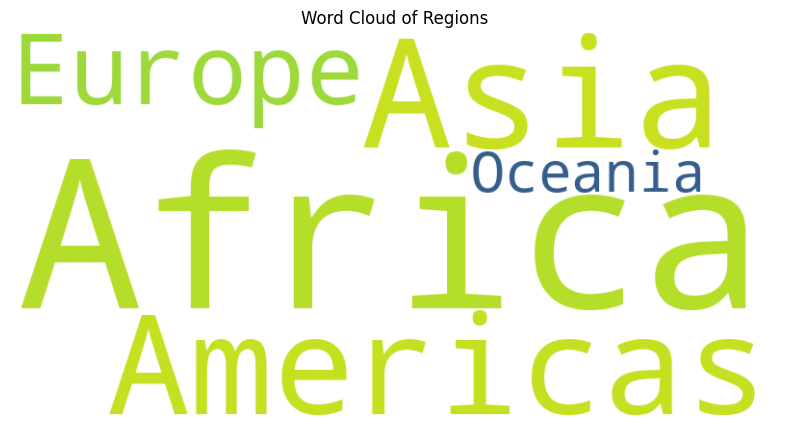

In [48]:
create_word_cloud(df, 'Region', 'Word Cloud of Regions')

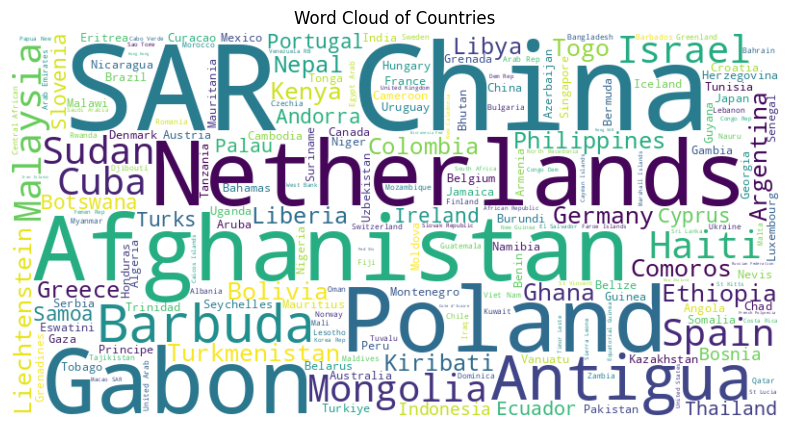

In [49]:
create_word_cloud(df, 'Country', 'Word Cloud of Countries')

The word cloud suggests that certain countries or regions appear more frequently in the dataset, indicating a higher representation or focus on these areas. For example, larger words could indicate that specific regions like Asia or Africa dominate the dataset, which might influence the overall trends observed.

**Box and Whisker Plot**

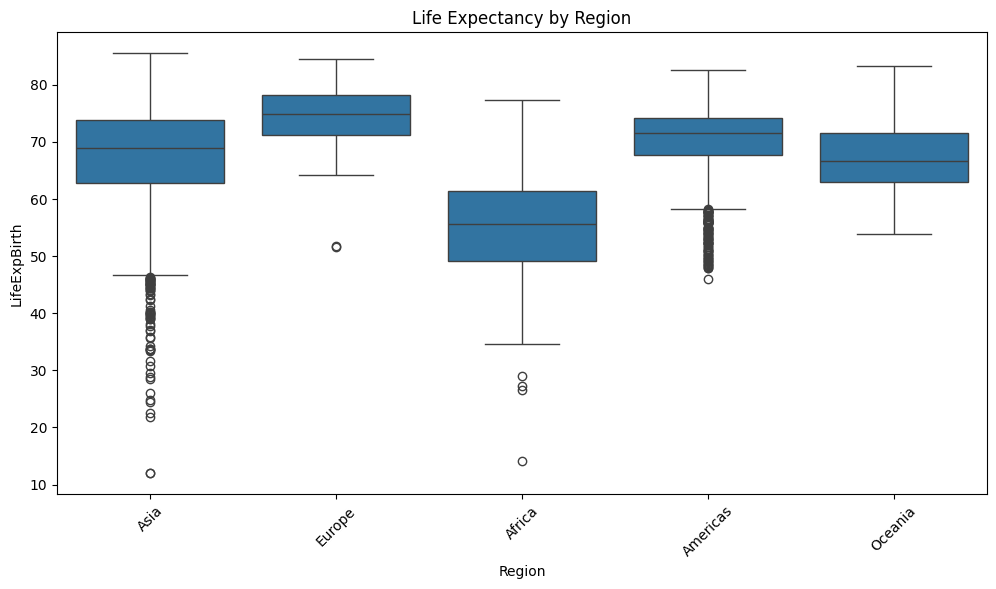

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='LifeExpBirth', data=df)
plt.title('Life Expectancy by Region')
plt.xticks(rotation=45)
plt.show()

Life Expectancy is notably higher in regions like Europe and Oceania, while Africa shows lower life expectancy with more variability. This indicates better health outcomes in developed regions compared to developing regions.

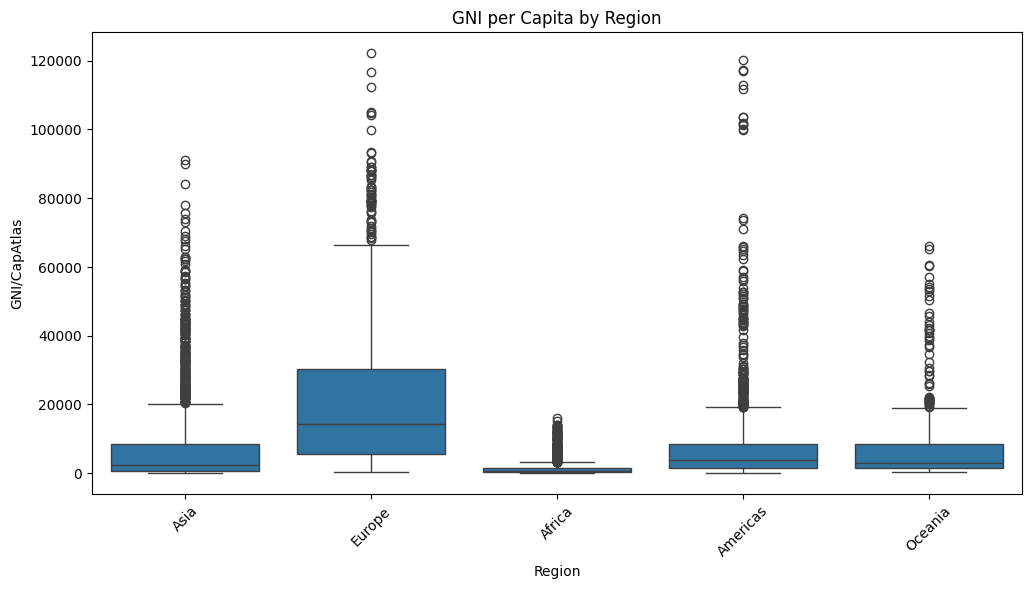

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='GNI/CapAtlas', data=df)
plt.title('GNI per Capita by Region')
plt.xticks(rotation=45)
plt.show()

Regions such as Europe and North America show higher GNI per Capita, with relatively smaller interquartile ranges, indicating more consistent income levels. Conversely, regions like Africa exhibit a wider range and lower median GNI, pointing to greater economic disparity.

**Violin Plot**

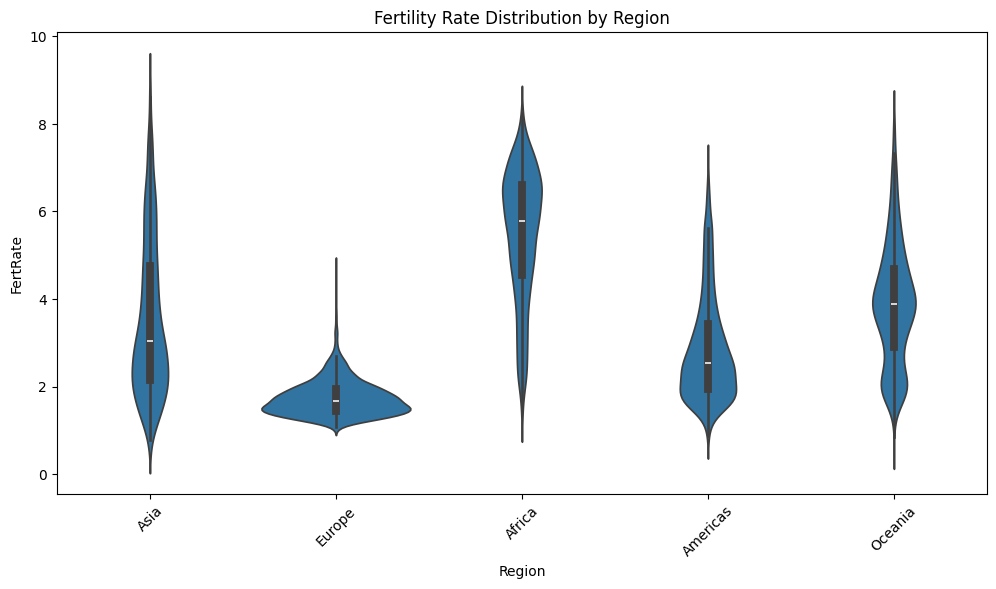

In [52]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Region', y='FertRate', data=df)
plt.title('Fertility Rate Distribution by Region')
plt.xticks(rotation=45)
plt.show()


Regions such as Africa show a higher fertility rate with significant variability, while Europe has lower fertility rates with less variation. This could indicate different population growth dynamics, with Africa experiencing higher growth rates compared to more developed regions.

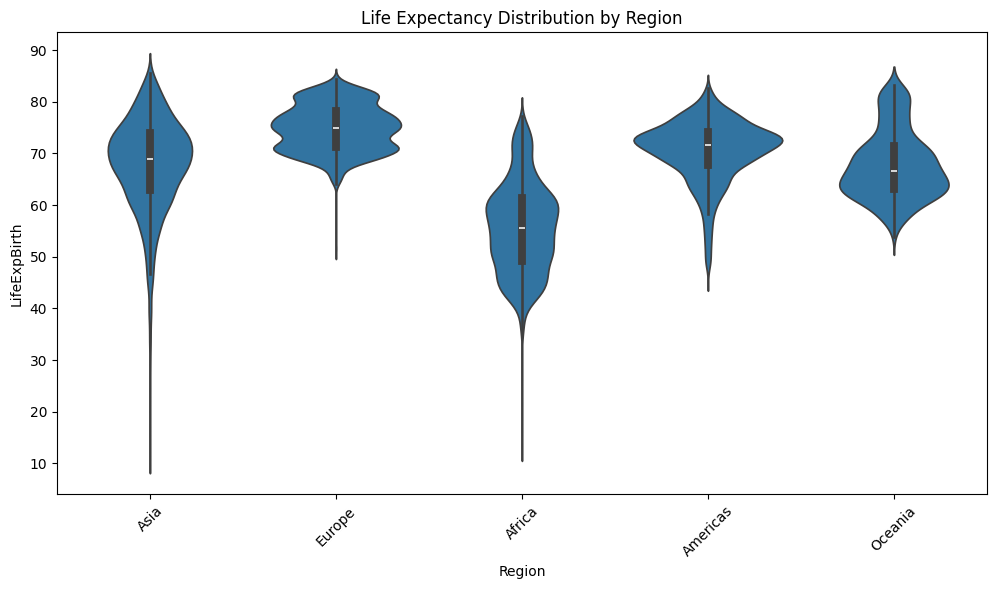

In [53]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Region', y='LifeExpBirth', data=df)
plt.title('Life Expectancy Distribution by Region')
plt.xticks(rotation=45)
plt.show()

The distribution of Life Expectancy is more compact in Europe and Oceania, suggesting that most countries in these regions have similar life expectancies. In contrast, Africa shows a wider distribution, indicating significant differences in health outcomes across different countries within the region.

**Regression Plot**

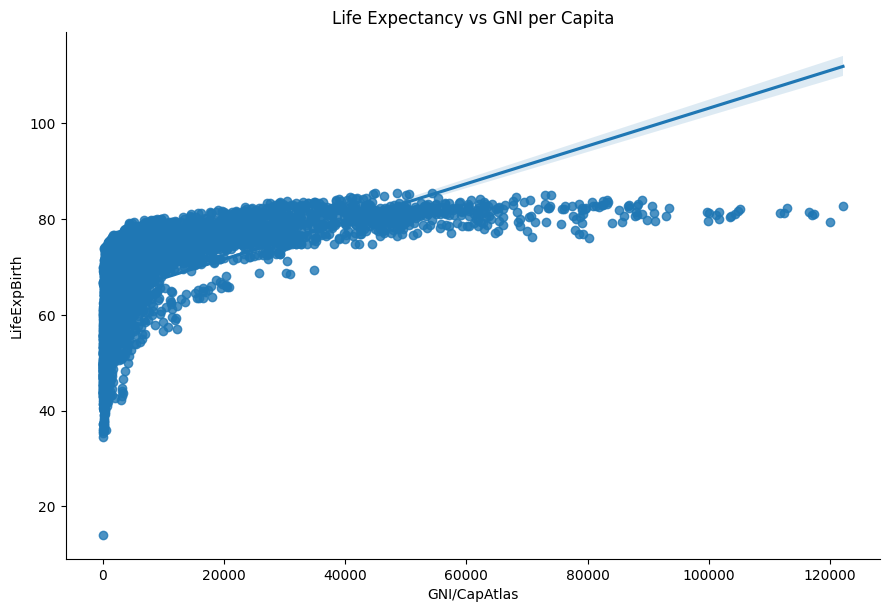

In [54]:
sns.lmplot(x='GNI/CapAtlas', y='LifeExpBirth', data=df, height=6, aspect=1.5)
plt.title('Life Expectancy vs GNI per Capita')
plt.show()

There is a positive correlation between GNI per Capita and Life Expectancy, indicating that higher income levels are associated with longer life expectancy. However, the scatter of points suggests that other factors may also influence life expectancy beyond income

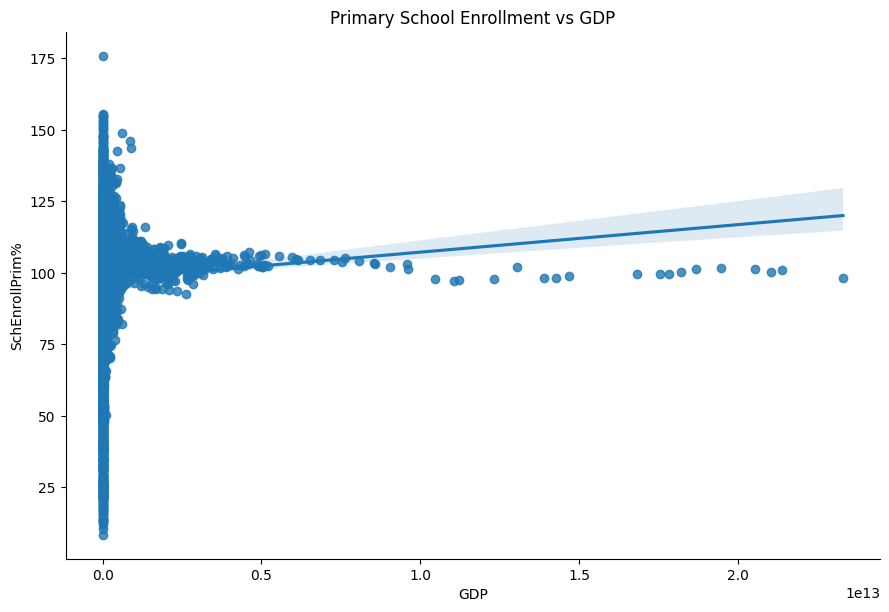

In [55]:
sns.lmplot(x='GDP', y='SchEnrollPrim%', data=df, height=6, aspect=1.5)
plt.title('Primary School Enrollment vs GDP')
plt.show()

The regression shows a positive relationship between GDP and primary school enrollment, implying that countries with higher GDP tend to have better access to education. Yet, there are outliers indicating that some countries achieve high enrollment rates despite lower GDP.

**3D Chart**

In [56]:
import plotly.express as px
import numpy as np


# Normalize PopTotal for size (log scale to handle large variations)
df_clean['PopTotal_normalized'] = np.log1p(df_clean['PopTotal'])

# Create the 3D scatter plot
fig = px.scatter_3d(df_clean,
                    x='GNI/CapAtlas',
                    y='LifeExpBirth',
                    z='FertRate',
                    color='Region',
                    size='PopTotal_normalized',
                    hover_name='Country',
                    title='3D Scatter Plot: GNI, Life Expectancy, and Fertility Rate')

# Update the layout for better readability
fig.update_layout(scene = dict(
                    xaxis_title='GNI per Capita (Atlas method)',
                    yaxis_title='Life Expectancy at Birth',
                    zaxis_title='Fertility Rate'),
                  width=900,
                  height=700,
                  margin=dict(r=20, b=10, l=10, t=40))

# Show the plot
fig.show()


<ipython-input-56-e9606c692055>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Countries with higher GNI tend to have lower fertility rates and higher life expectancy, clustering in one area of the plot. Developing regions like Africa may be observed in the opposite end, with lower GNI, higher fertility, and lower life expectancy, indicating a direct relationship between economic development and population health outcomes.

In [57]:

# Remove rows with NaN values in the columns we're using for x, y, z, and color
df_clean = df.dropna(subset=['GDP', 'SchEnrollPrim%', 'UrbanPopGrowth%', 'Region', 'Country'])

# Handle PopTotal separately
if df_clean['PopTotal'].isnull().all():
    print("\nWarning: All values in PopTotal are NaN. Using a constant size for all points.")
    df_clean['size'] = 10  # Use a constant size if all PopTotal values are NaN
else:
    # Replace NaN in PopTotal with median and set a minimum threshold
    pop_median = df_clean['PopTotal'].median()
    pop_min = max(100, df_clean['PopTotal'].min())  # Use 100 or the minimum non-zero value, whichever is larger
    df_clean['PopTotal'] = df_clean['PopTotal'].fillna(pop_median)
    df_clean['PopTotal'] = df_clean['PopTotal'].clip(lower=pop_min)

    # Normalize PopTotal for size (log scale to handle large variations)
    df_clean['size'] = np.log(df_clean['PopTotal'])

# Print the shape of the cleaned dataframe
print(f"\nShape of cleaned dataframe: {df_clean.shape}")




Shape of cleaned dataframe: (7346, 34)


<ipython-input-57-55e8ada73696>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-57-55e8ada73696>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-57-55e8ada73696>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
# Create the 3D scatter plot
fig = px.scatter_3d(df_clean,
                    x='GDP',
                    y='SchEnrollPrim%',
                    z='UrbanPopGrowth%',
                    color='Region',
                    size='size',
                    hover_name='Country',
                    title='3D Scatter Plot: GDP, School Enrollment, and Urban Population Growth')

# Update the layout for better readability
fig.update_layout(scene = dict(
                    xaxis_title='GDP',
                    yaxis_title='School Enrollment (Primary %)',
                    zaxis_title='Urban Population Growth %'),
                  width=900,
                  height=700,
                  margin=dict(r=20, b=10, l=10, t=40))

# Show the plot
fig.show()

Countries with higher GDP generally have higher school enrollment rates and varying levels of urban population growth. This suggests that economic development is often accompanied by improvements in education but may not necessarily lead to uniform urbanization trends

**Jitter Plot**

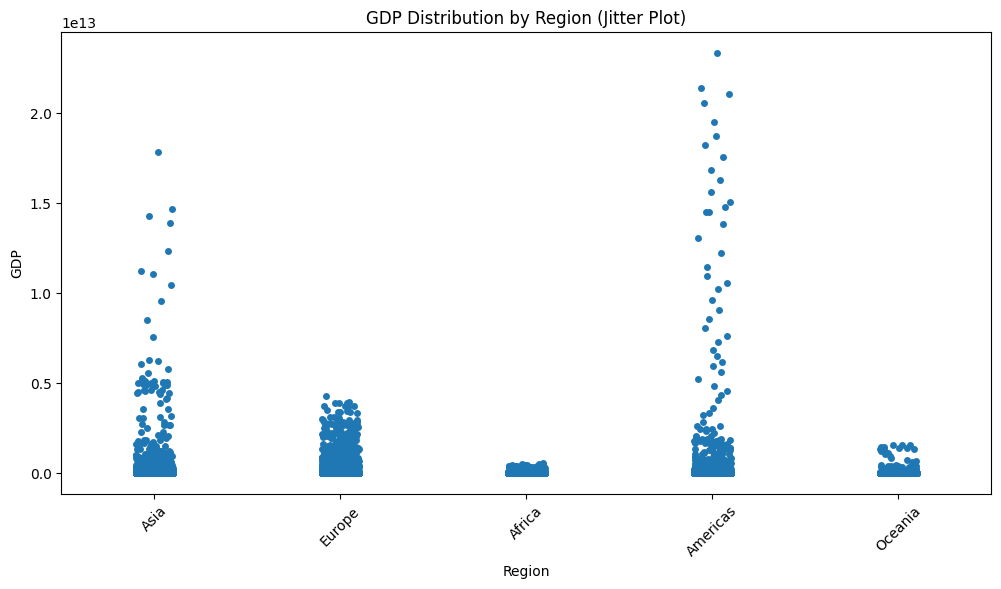

In [59]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='Region', y='GDP', data=df, jitter=True)
plt.title('GDP Distribution by Region (Jitter Plot)')
plt.xticks(rotation=45)
plt.show()

The jitter plot reveals a wide variation in GDP across different regions, with some regions showing a concentration of high GDP countries (e.g., Europe), while others have a more even distribution across low and medium GDP values (e.g., Africa).

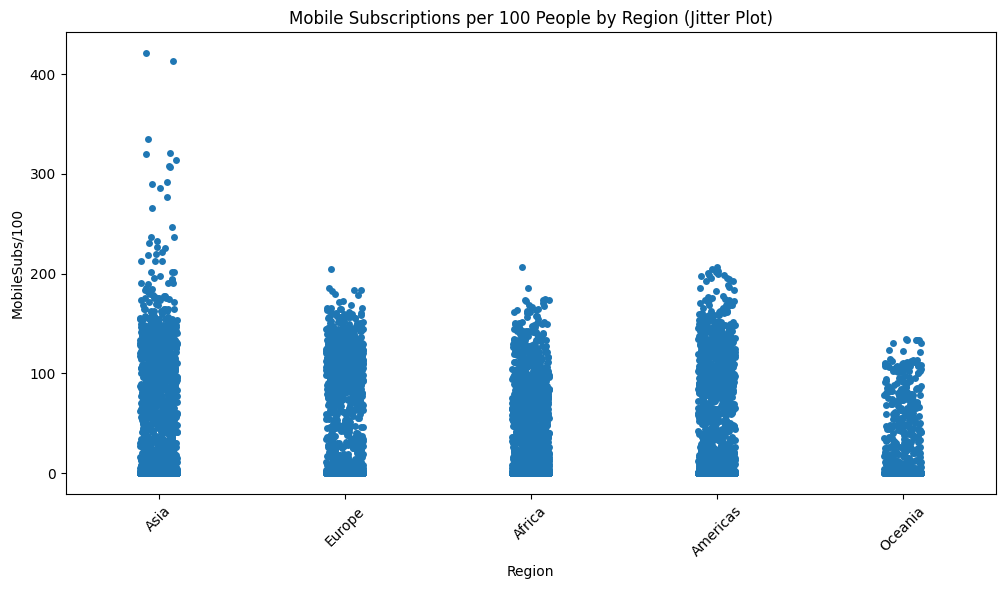

In [60]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='Region', y='MobileSubs/100', data=df, jitter=True)
plt.title('Mobile Subscriptions per 100 People by Region (Jitter Plot)')
plt.xticks(rotation=45)
plt.show()

There is a significant variation in mobile subscription rates, with developed regions showing higher subscriptions per 100 people. Regions like Africa have a broader spread, indicating varying levels of access to mobile technology across the continent.

**Line Chart**

In [61]:
df_sorted = df.sort_values('Year')
fig = px.line(df_sorted, x='Year', y='GDP', color='Country', title='GDP Over Time by Country')
fig.show()

The line chart demonstrates that countries like the United States and China have shown consistent GDP growth over time, while some countries experience fluctuations or stagnation, reflecting economic stability or volatility.

In [62]:
fig = px.line(df_sorted, x='Year', y='LifeExpBirth', color='Country', title='Life Expectancy Over Time by Country')
fig.show()

Life expectancy trends upward for most countries, reflecting improvements in healthcare and living conditions over time. However, some countries show stagnation or decline, which may indicate ongoing health crises or economic challenges.

**Waterfall Chart**

In [64]:
def create_waterfall_chart(df, country, measures, title):
    country_data = df[df['Country'] == country].iloc[0]

    fig = go.Figure(go.Waterfall(
        name = "20", orientation = "v",
        measure = ["relative"] * len(measures),
        x = measures,
        textposition = "outside",
        text = [f"{country_data[m]:.2f}" for m in measures],
        y = [country_data[m] for m in measures],
        connector = {"line":{"color":"rgb(63, 63, 63)"}},
    ))

    fig.update_layout(title = title, showlegend = False)
    fig.show()

In [65]:
create_waterfall_chart(df, 'Netherlands',
                       ['GNI/CapAtlas', 'GDP', 'Exports%GDP', 'Imports%GDP'],
                       'Economic Indicators for Netherlands')

In [66]:

create_waterfall_chart(df, 'Egypt, Arab Rep.',
                       ['LifeExpBirth', 'FertRate', 'MortRateU5', 'PopGrowth%'],
                       'Demographic Indicators for Egypt')

**Donut Charts**

In [67]:
df_gdp = df.groupby('Region')['GDP'].sum().reset_index()
fig_donut1 = px.pie(df_gdp, values='GDP', names='Region', title='GDP Distribution by Region', hole=0.4)
fig_donut1.show()

In [68]:
df_pop = df.groupby('Region')['PopTotal'].sum().reset_index()
fig_donut2 = px.pie(df_pop, values='PopTotal', names='Region', title='Population Distribution by Region', hole=0.4)
fig_donut2.show()


**Funnel Charts**

In [69]:
df_gni = df.sort_values('GNI/CapAtlas', ascending=False).head(10)
fig_funnel1 = go.Figure(go.Funnel(
    y = df_gni['Country'],
    x = df_gni['GNI/CapAtlas'],
    textinfo = "value+percent initial"
))
fig_funnel1.update_layout(title='Top 10 Countries by GNI per Capita')
fig_funnel1.show()

In [70]:
df_life = df.sort_values('LifeExpBirth', ascending=False).head(10)
fig_funnel2 = go.Figure(go.Funnel(
    y = df_life['Country'],
    x = df_life['LifeExpBirth'],
    textinfo = "value+percent initial"
))
fig_funnel2.update_layout(title='Top 10 Countries by Life Expectancy')
fig_funnel2.show()

**Treemap Charts**

In [71]:
fig_treemap1 = px.treemap(df, path=['Region', 'Country'], values='GDP',
                          title='GDP by Region and Country')
fig_treemap1.show()

In [72]:
fig_treemap2 = px.treemap(df, path=['Region', 'Country'], values='PopTotal',
                          title='Population by Region and Country')
fig_treemap2.show()

**Conclusion:** From this experiment , i learned about advance visualizations like word chart , box and whisker plot and many more charts and how to implement that charts in python